In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

# Load Model    

In [12]:
# Load the model
model = keras.models.load_model('fitmotion_model.keras')

c:\ProgramData\miniconda3\envs\tf_testing\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Loading The Data

In [16]:
labels = ['dws', 'jog', 'sit', 'std', 'ups', 'wlk']

In [23]:
# Load testing data
data_url = '/wlk_8/sub_2.csv'
df = pd.read_csv('dataset' + data_url)
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.310373,-1.309689,1.442206,0.249436,0.966105,-0.066468,2.203753,-2.326351,-0.293739,-0.157547,0.178961,0.359559
1,1.097026,-1.295214,1.256769,0.242127,0.962267,-0.124143,2.707412,-1.613123,-0.071081,0.066085,0.502378,0.430433
2,0.917966,-1.265394,1.100944,0.238842,0.953726,-0.182638,2.663869,-1.221393,0.039208,0.120747,0.856165,0.246892
3,0.777748,-1.234542,0.972128,0.231515,0.943997,-0.235085,2.444950,-0.694995,-0.341146,0.084631,0.667331,0.312035
4,0.661369,-1.202601,0.858087,0.221066,0.932978,-0.284037,2.520765,-0.663370,-0.323566,0.096210,0.278890,0.300409
...,...,...,...,...,...,...,...,...,...,...,...,...
5609,0.350140,-0.838861,1.381347,0.229246,0.743883,-0.627750,1.003466,-2.725248,1.230260,-0.113920,-0.371568,0.837009
5610,0.309553,-0.815521,1.406731,0.208820,0.728083,-0.652898,0.748522,-3.078591,1.102882,-0.147342,-0.473368,0.891042
5611,0.264249,-0.798185,1.424170,0.182306,0.716091,-0.673770,0.610296,-2.728948,0.632519,-0.123407,-0.572582,0.897921
5612,0.225291,-0.786542,1.432158,0.157778,0.707915,-0.688440,0.384940,-1.899222,0.326507,-0.200060,-0.342818,0.818216


# Preprocessing Data

In [17]:
# Prepare the data
WINDOW_LENGTH = 150
STRIDE_LENGTH = 10
NUM_CLASSES = 6
NUM_FEATURES = 12
BATCH_SIZE = 100
EPOCHS_SIZE = 10

In [24]:
from scipy.stats import mode

def sequence_generator(x, length, stride):
    seq_x = []
    data_length = len(x)

    for i in range(0, data_length - length + 1, stride):
        input_sequence = x.iloc[i : i + length]
        seq_x.append(input_sequence)
    return np.array(seq_x)

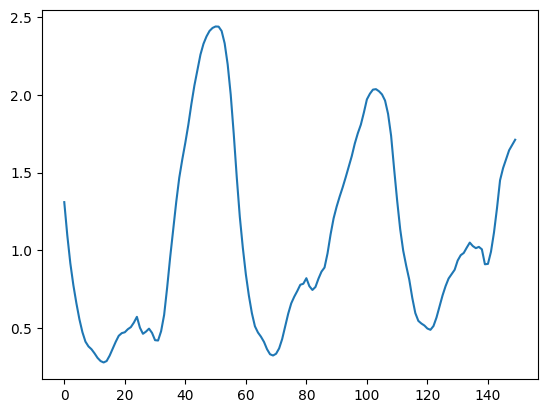

In [25]:
# Checking data
import matplotlib.pyplot as plt

tx = sequence_generator(df, WINDOW_LENGTH, STRIDE_LENGTH)
plt.plot(tx[0][0:150, 0])
plt.show()

# Prediction

In [41]:
# Predict the data
y_pred = model.predict(tx)

# Get the most frequent label
y_pred = np.argmax(y_pred, axis=1)
y_pred = mode(y_pred)[0]
labels[y_pred]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


5